# Mini Project 2 - IU 4.5 Statistical Analysis

## Code checked into Github
git clone https://github.com/irfancode/Statistical_Analysis

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
#user_df=pd.read_excel("./Mini_project_2_Data.xls")

user_df=pd.read_csv("./Mini_project_2_Data.xls")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

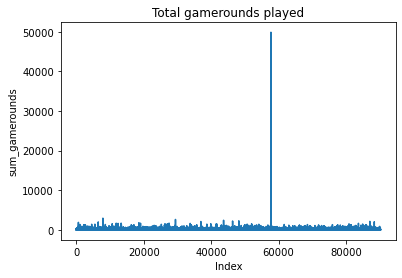

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds);

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
outlier_val = user_df.sum_gamerounds.max()
outlier_ind = user_df.index[user_df['sum_gamerounds']==user_df['sum_gamerounds'].max()][0]
print("The outlier is with value of: ", outlier_val , " and the index is ", outlier_ind)

The outlier is with value of:  49854  and the index is  57702


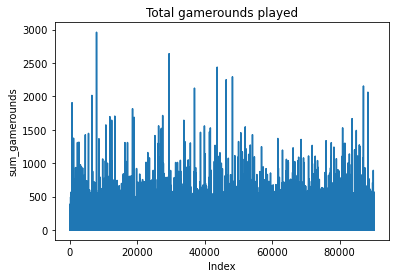

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
user_df.drop(index=outlier_ind, inplace = True)
plt.plot(user_df.sum_gamerounds);

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [7]:
#Insert calculation for 7-day retention rate

rows, column        = user_df.shape
f_val, t_val        = user_df.retention_7.value_counts()
retention_rate_7    = t_val / rows * 100

print("Overal 7 days retention rate of the game for both versions is: " , round(retention_rate_7, 2) ,"%")

Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [8]:
# Find number of customers with sum_gamerounds is equal to zero
print("Number of player never played after installing the game =", (user_df.sum_gamerounds==0).sum())

Number of player never played after installing the game = 3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Total numbers of users for the first 200 gamerounds  84966


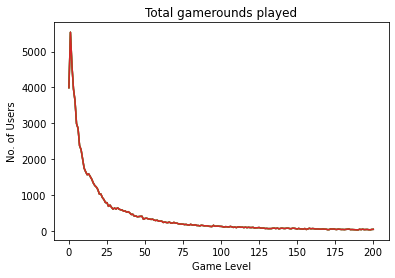

In [9]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

print('Total numbers of users for the first 200 gamerounds ',user_df.query('sum_gamerounds <= 200').count()['userid'])

plt.title("Total gamerounds played")
plt.xlabel("Game Level")
plt.ylabel("No. of Users")
plt.plot(user_df.groupby(['sum_gamerounds']).count().query('sum_gamerounds <= 200'));


## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [10]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

user_df.version

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


0        gate_30
1        gate_30
2        gate_40
3        gate_40
4        gate_40
          ...   
90184    gate_40
90185    gate_40
90186    gate_30
90187    gate_40
90188    gate_40
Name: version, Length: 90188, dtype: object

<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   

### Q3.2 Gamerounds summary for different game versions

In [11]:
#use pandas group by to calculate average game rounds played summarized by different versions

print("Average game rounds played by Gate 30 versions is", round(user_df[user_df.version=="gate_30"].mean()[1],2))
print("Average game rounds played by Gate 40 versions is", round(user_df[user_df.version=="gate_40"].mean()[1],2))

Average game rounds played by Gate 30 versions is 51.34
Average game rounds played by Gate 40 versions is 51.3


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [12]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="gate_30"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="gate_40"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [13]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
stats.shapiro(group_A.sum_gamerounds)

#test for group_B
stats.shapiro(group_B.sum_gamerounds)

print("Both test shows the p-value less than 0.5, hence test rejects, data does not fit the normal distribution.")


ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

Both test shows the p-value less than 0.5, hence test rejects, data does not fit the normal distribution.


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

### Q4.2 Test of homegienity of variance

In [14]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds, center= 'median')



LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test

### Q4.3 Test of significance: Two sample test

In [15]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

from statsmodels.stats import weightstats as stests
stests.ztest(x1 = group_A.sum_gamerounds ,x2 = group_B.sum_gamerounds)

(0.0633675766982082, 0.9494738053904274)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [16]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
Asum = group_A.shape[0]
Bsum = group_B.shape[0]

user_df.groupby(['version','retention_1'])['userid'].count().apply(lambda r: r/Asum*100)
user_df.groupby(['version','retention_7'])['userid'].count().apply(lambda r: r/Bsum*100)

print('Group A size:', Asum)
print('Group B size:', Bsum)

version  retention_1
gate_30  False          55.180205
         True           44.819795
gate_40  False          56.757422
         True           45.009955
Name: userid, dtype: float64

version  retention_7
gate_30  False          79.575282
         True           18.688034
gate_40  False          81.799996
         True           18.200004
Name: userid, dtype: float64

Group A size: 44699
Group B size: 45489


In [17]:
#Additional check: Checking std and mean
box_df = user_df.groupby('version').describe()
print(box_df)


          userid                                                           \
           count          mean           std    min        25%        50%   
version                                                                     
gate_30  44699.0  4.987532e+06  2.881051e+06  116.0  2505463.0  4983630.0   
gate_40  45489.0  5.009073e+06  2.885496e+06  377.0  2517171.0  5007329.0   

                              sum_gamerounds                                   \
               75%        max          count       mean         std  min  25%   
version                                                                         
gate_30  7481522.5  9999710.0        44699.0  51.342111  102.057598  0.0  5.0   
gate_40  7510762.0  9999861.0        45489.0  51.298776  103.294416  0.0  5.0   

                             
          50%   75%     max  
version                      
gate_30  17.0  50.0  2961.0  
gate_40  16.0  52.0  2640.0  


In [18]:
#Additional check: Check p-value using pg
import pingouin as pg
res = pg.ttest(group_A.sum_gamerounds, group_B.sum_gamerounds, correction=False)


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [19]:
#Hint: Plot density function
#bootstrap

import random

# Generate Random Data

retention1_groupAD = np.random.normal(loc= 0.448198, size=44699)
retention1_groupBD = np.random.normal (loc= 0.442283, size=45489)
retention7_groupAD = np.random.normal (loc = 0.190183, size = 44699)
retention7_groupBD = np.random.normal (loc = 0.182000, size = 45489)
print('the mean of retention in 1 day of version: gate_30 is:', np.mean(retention1_groupAD))
print('the mean of retention in 1 day of version: gate_40 is:', np.mean(retention1_groupBD))
print('the mean of retention in 7 days of version: gate_30 is:', np.mean(retention7_groupAD))
print('the mean of retention in 7 days of version: gate_40 is:', np.mean(retention7_groupBD))

the mean of retention in 1 day of version: gate_30 is: 0.44855429205294794
the mean of retention in 1 day of version: gate_40 is: 0.4411256001200869
the mean of retention in 7 days of version: gate_30 is: 0.19216824957965664
the mean of retention in 7 days of version: gate_40 is: 0.17536533459284545


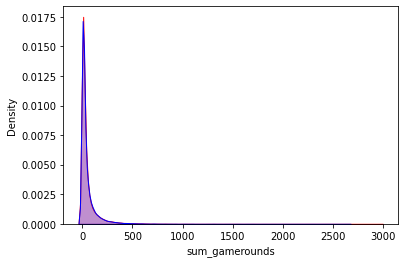

In [20]:
fig = sns.kdeplot(group_A['sum_gamerounds'], shade=True, color="r")
fig = sns.kdeplot(group_B['sum_gamerounds'], shade=True, color="b")
plt.show()

In [21]:
#Use Bootstrap Sampling to estimate the mean for retention in day 1 on version: gate_30

retention1A_mean=[]

for retention in user_df.retention_1:
   
    y = random.sample(retention1_groupAD.tolist(), 1)
    avg = np.mean(y)
    retention1A_mean.append(avg)
    
print('the mean of retention in 1 day of version: gate_30 is:', np.mean(retention1A_mean))    

the mean of retention in 1 day of version: gate_30 is: 0.4504155119513698


In [22]:
#Use Bootstrap Sampling to estimate the mean for retention in day 7 on version: gate_30

retention7A_mean=[]

for retention in user_df.retention_7:
   
    y = random.sample(retention7_groupAD.tolist(), 1)
    avg = np.mean(y)
    retention7A_mean.append(avg)
    
print('the mean of retention in 1 day of version: gate_40 is:', np.mean(retention7A_mean))    

In [ ]:
#Use Bootstrap Sampling to estimate the mean for retention in day 1 on version: gate_40

retention1B_mean=[] 

for retention in user_df.retention_1:
   
    y = random.sample(retention1_groupBD.tolist(), 1)
    avg = np.mean(y)
    retention1B_mean.append(avg)
print('the mean of retention in 7 days of version: gate_30 is:', np.mean(retention1B_mean))    

the mean of retention in 7 days of version: gate_30 is: 0.43884721634717166


In [ ]:
#Use Bootstrap Sampling to estimate the mean for retention in day 7 on version: gate_40
retention7B_mean=[]

for retention in user_df.retention_7:
   
    y = random.sample(retention7_groupBD.tolist(), 1)
    avg = np.mean(y)
    retention7B_mean.append(avg)
print('the mean of retention in 7 days of version: gate_40 is:', np.mean(retention7B_mean))    

the mean of retention in 7 days of version: gate_40 is: 0.1814485534956334


<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

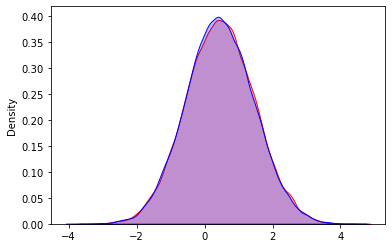

In [ ]:
#Plot Mean density of retetion for both gate_30 and gate_40 version on 1 day

df =sns.load_dataset('tips')

sns.kdeplot(retention1A_mean,shade=True,color='r' )
sns.kdeplot(retention1B_mean,shade=True,color='b' )



<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

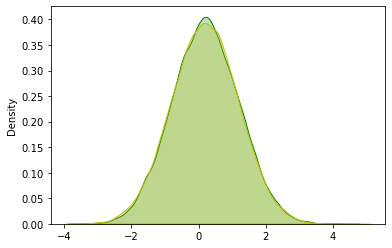

In [ ]:
#Plot Mean density of retetion for both gate_30 and gate_40 version on 7 day

df =sns.load_dataset('tips')

sns.kdeplot(retention7A_mean,shade=True, color='g' )
sns.kdeplot(retention7B_mean,shade=True, color='y' )



<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

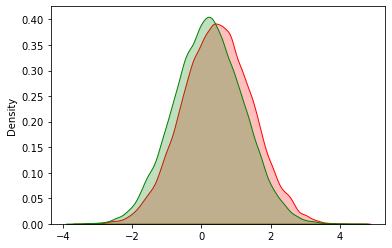

In [ ]:
#Plot Mean density of retetion for both 1day and 7days on gate_30 version to compare the mean

df =sns.load_dataset('tips')

sns.kdeplot(retention1A_mean,shade=True, color='r' )
sns.kdeplot(retention7A_mean,shade=True, color='g' )



<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

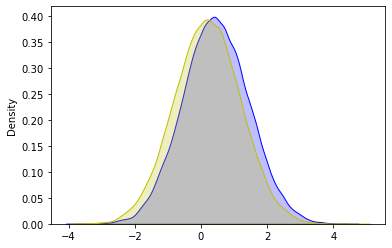

In [ ]:
#Plot Mean density of retetion for both 1day and 7days on gate_30 version to compare the mean

df =sns.load_dataset('tips')

sns.kdeplot(retention1B_mean,shade=True, color='b' )
sns.kdeplot(retention7B_mean,shade=True, color='y' )

